# Deep Learning: Fashion MNIST (Entrega 2)

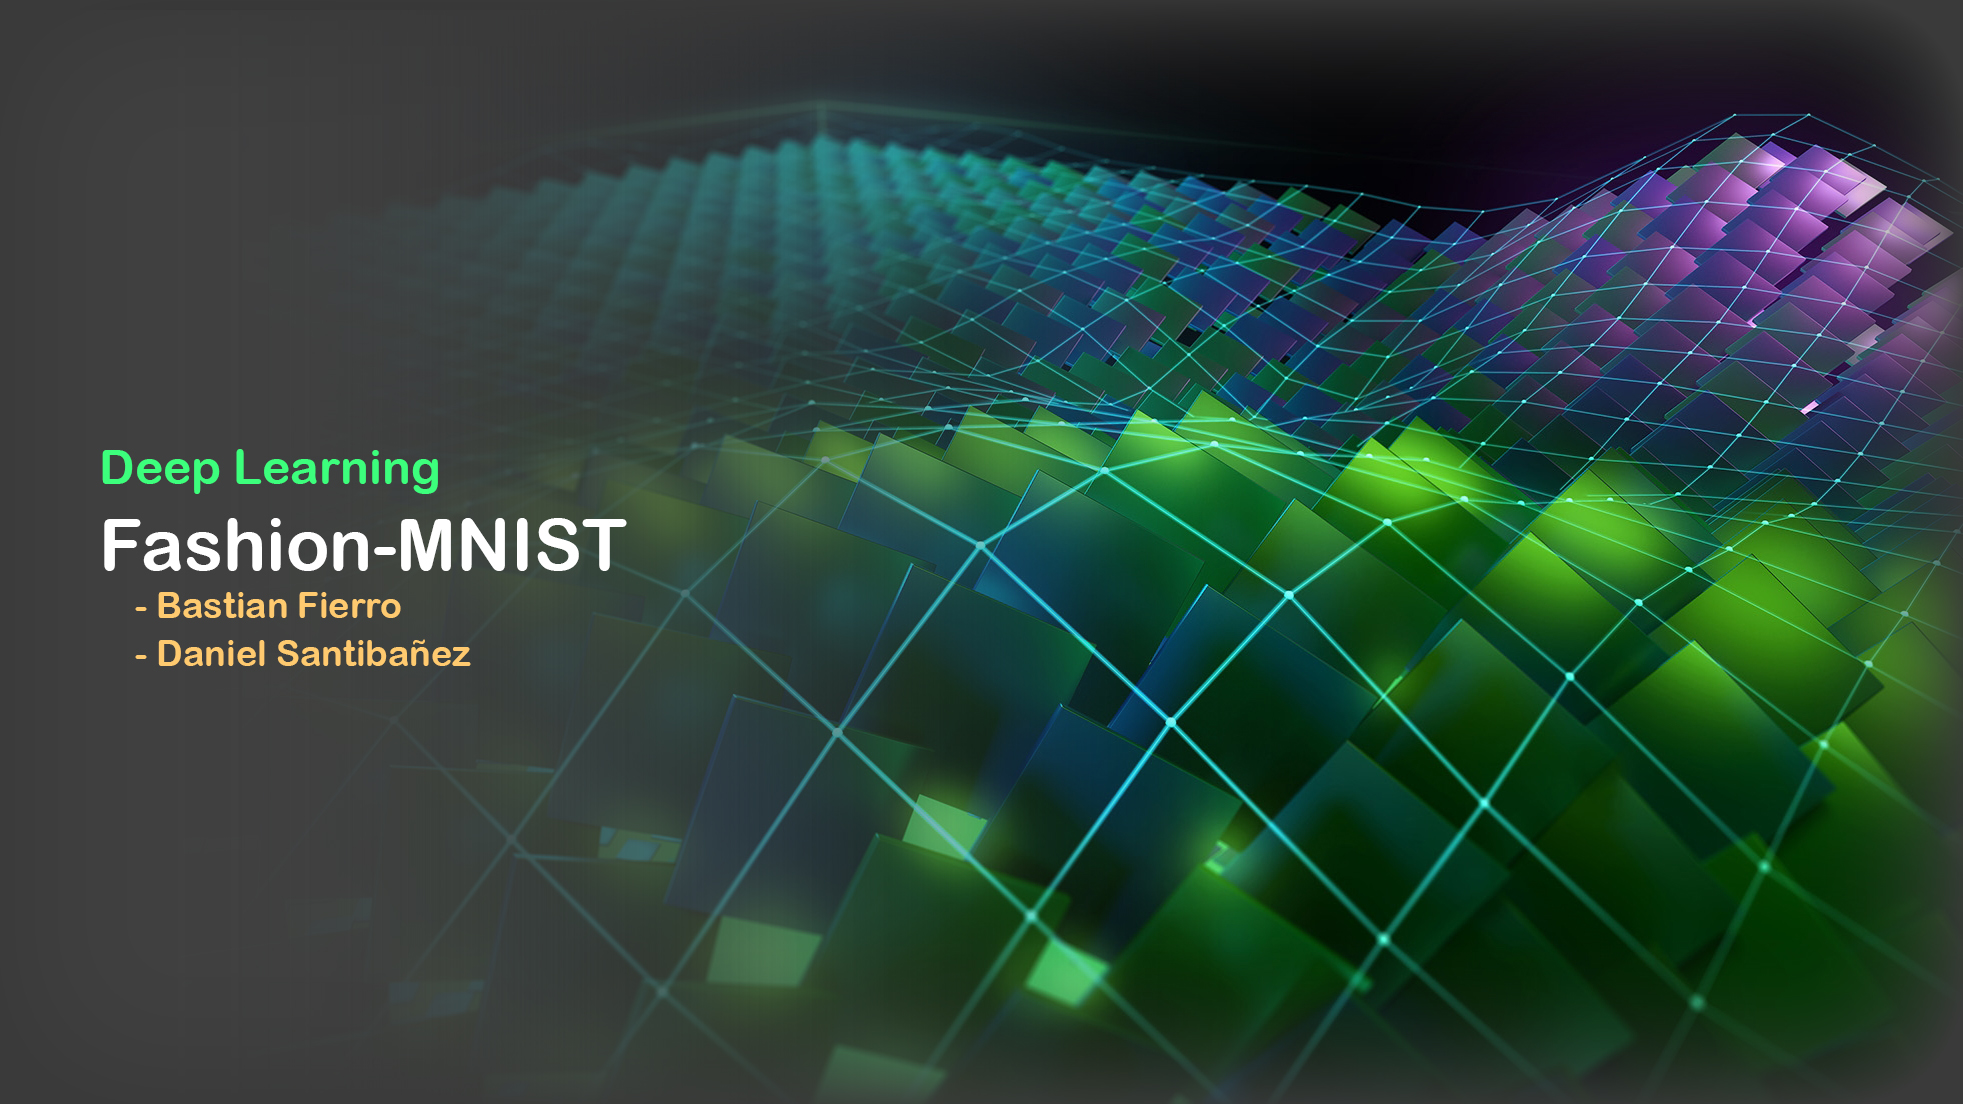

## Codigo inicial para optimizar el uso del GPU local.

In [ ]:
import tensorflow as tf

# Set the policy to mixed precision
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

tf.config.optimizer.set_jit(True)

# Configuración para permitir la asignación de memoria dinámica
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    # Memory growth must be set at program startup
    print(e)


In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 4080 (UUID: GPU-fb571f41-77a6-42b8-37c2-a5f686bf55db)


# 1. ▦ Carga de datos. Fashion-MNIST (5 puntos)

**Carga de datos. Fashion-MNIST (5 puntos)**

In [ ]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

# Cargamos datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = tf.keras.datasets.fashion_mnist.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)
(10000, 28, 28)


0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

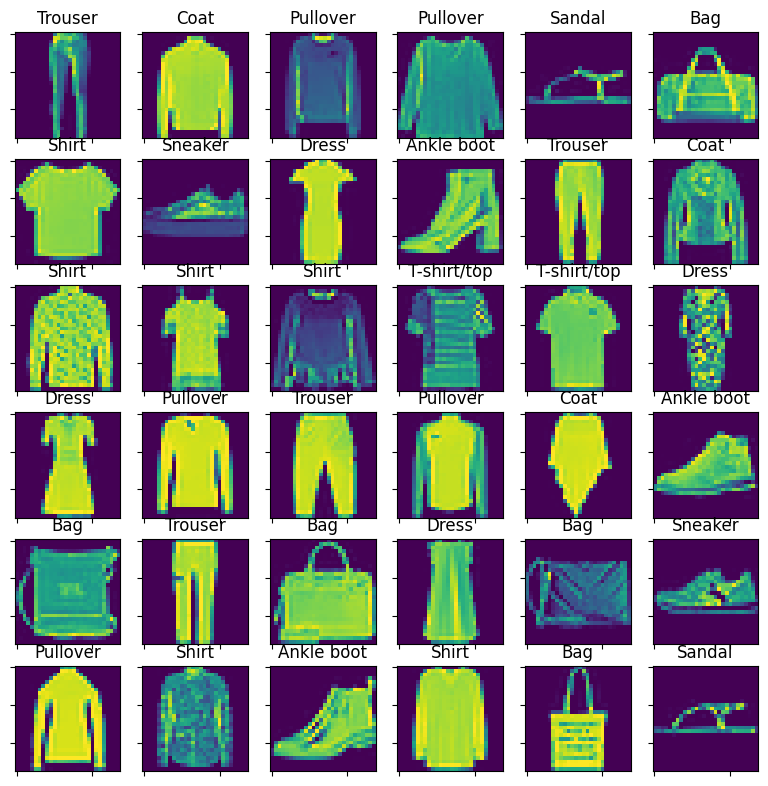

In [ ]:
# Mostramos una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [ ]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(60000,28*28)
X_test = imgs_test.reshape(10000,28*28)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (60000, 784) (10000, 784)
Y (60000, 10) (10000, 10)


In [ ]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

784 10 60000 10000


In [ ]:
from tensorflow.python.framework.ops import NullContextmanager


# 2. ▦ Cree 3 modelos (20 puntos)

**Cree 3 modelos de redes neuronales convolucionales con distintas arquitecturas(Pruebe arquitecturas pequeñas (alrededor de 50.000 parámetros), medianas(alrededor de 300.000 parámetros) y grandes (alrededor de 1 millón deparámetros)). Deje fijo los hiperparametros de las capas convolucionales y pooling.Entrene los modelos. (20 puntos)**

In [ ]:
from tensorflow.keras import backend as K


In [ ]:
# Redimensionamos los datos de entrada para que sean tridimensionales (alto, ancho, canales)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [ ]:
def mish(x):
    return x * K.tanh(K.softplus(x)); # Mish necesita definirse como función

## Modelo pequeño 1

2023-06-08 18:58:36.808493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 18:58:36.809126: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 18:58:36.809430: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 18:58:38.470222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-08 18:58:38.470448: I tensorflow/compile

Epoch 1/24


2023-06-08 18:58:38.764520: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-06-08 18:58:38.902364: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-06-08 18:58:39.017583: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).
2023-06-08 18:58:40.122434: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.
2023-06-08 18:58:40.122508: W tensorflow/tsl/framework/cpu_al

6/6 [==============================] - 14s 191ms/step - loss: 2.2666 - accuracy: 0.2457 - val_loss: 2.1895 - val_accuracy: 0.3087
Epoch 2/24
6/6 [==============================] - 0s 31ms/step - loss: 2.0801 - accuracy: 0.2843 - val_loss: 1.8965 - val_accuracy: 0.2807
Epoch 3/24
6/6 [==============================] - 0s 33ms/step - loss: 1.7152 - accuracy: 0.3434 - val_loss: 1.4805 - val_accuracy: 0.4313
Epoch 4/24
6/6 [==============================] - 0s 32ms/step - loss: 1.3166 - accuracy: 0.5017 - val_loss: 1.1240 - val_accuracy: 0.6287
Epoch 5/24
6/6 [==============================] - 0s 38ms/step - loss: 1.0140 - accuracy: 0.6452 - val_loss: 0.9233 - val_accuracy: 0.6309
Epoch 6/24
6/6 [==============================] - 0s 37ms/step - loss: 0.8472 - accuracy: 0.6813 - val_loss: 0.7939 - val_accuracy: 0.7187
Epoch 7/24
6/6 [==============================] - 0s 35ms/step - loss: 0.7292 - accuracy: 0.7385 - val_loss: 0.6963 - val_accuracy: 0.7410
Epoch 8/24
6/6 [====================

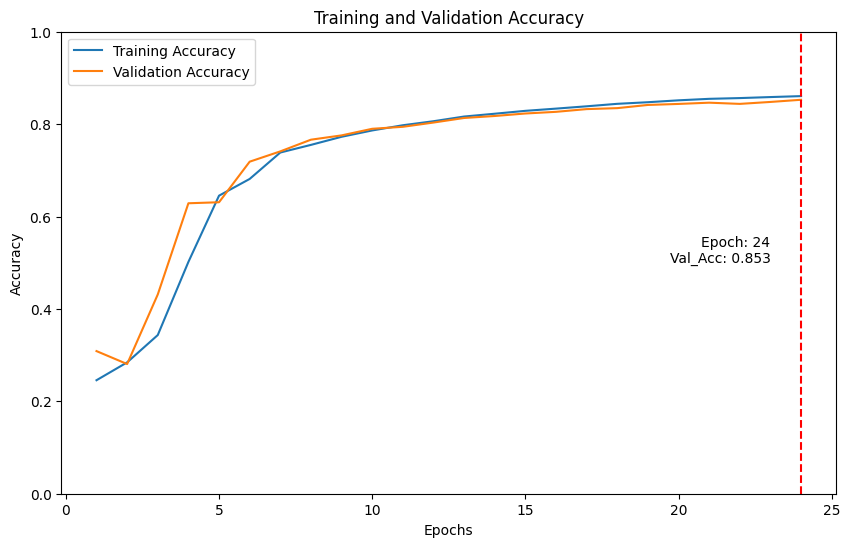

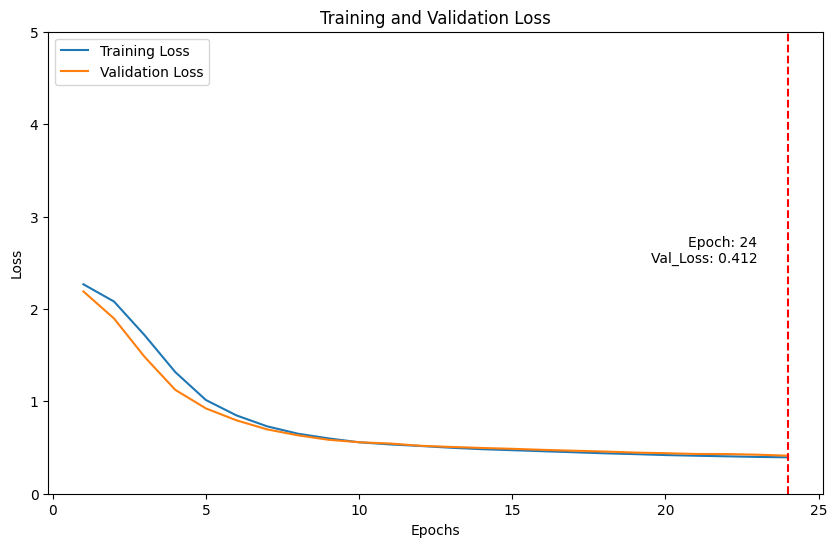

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 12
conv_kernel_size = (3, 3)
conv_strides = (1, 1)
conv_padding = 'valid'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 24
dense_units_2 = 48
dense_units_3 = 96
dense_units_4 = 96
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura pequeña
model = keras.Sequential([
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    keras.layers.Flatten(name='flatten'),
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
        keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### El modelo pequeño generaliza bastante bien, no presenta overfitting y tampoco se podría considerar underfitting, ya que logra un accuracy y validation accuracy bastante alto, muy por encima del 50%. Además, tiene un loss bajo. Por lo tanto, este modelo no sufre de overfitting ni underfitting, pero aún podría ser mejorado.

#### validation loss: 0.412 validation accuracy: 0.853

## Modelo mediano 1

Epoch 1/24
6/6 [==============================] - 5s 192ms/step - loss: 2.0345 - accuracy: 0.3399 - val_loss: 1.4551 - val_accuracy: 0.4430
Epoch 2/24
6/6 [==============================] - 0s 38ms/step - loss: 1.1462 - accuracy: 0.5716 - val_loss: 0.9336 - val_accuracy: 0.6372
Epoch 3/24
6/6 [==============================] - 0s 35ms/step - loss: 0.8228 - accuracy: 0.7005 - val_loss: 0.7544 - val_accuracy: 0.7272
Epoch 4/24
6/6 [==============================] - 0s 33ms/step - loss: 0.6820 - accuracy: 0.7436 - val_loss: 0.6499 - val_accuracy: 0.7621
Epoch 5/24
6/6 [==============================] - 0s 32ms/step - loss: 0.6070 - accuracy: 0.7696 - val_loss: 0.5986 - val_accuracy: 0.7716
Epoch 6/24
6/6 [==============================] - 0s 30ms/step - loss: 0.5574 - accuracy: 0.7889 - val_loss: 0.5547 - val_accuracy: 0.7891
Epoch 7/24
6/6 [==============================] - 0s 29ms/step - loss: 0.5196 - accuracy: 0.8054 - val_loss: 0.5249 - val_accuracy: 0.8062
Epoch 8/24
6/6 [==========

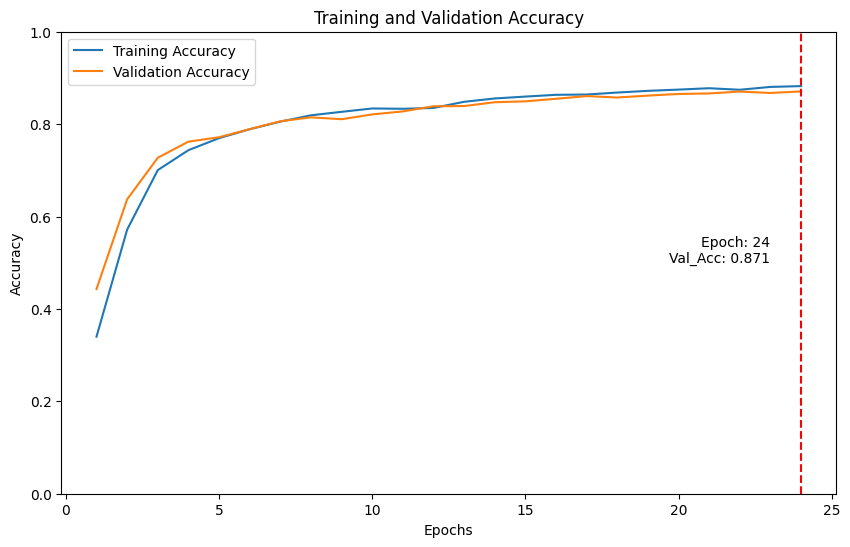

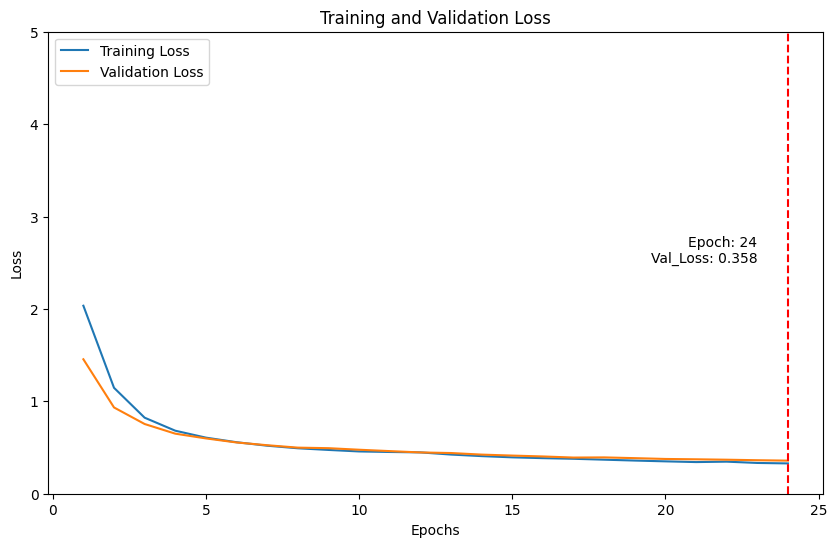

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 12
conv_kernel_size = (3, 3)
conv_strides = (1, 1)
conv_padding = 'valid'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 96
dense_units_2 = 192
dense_units_3 = 384
dense_units_4 = 384
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura mediana
model = keras.Sequential([
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    keras.layers.Flatten(name='flatten'),
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### El modelo mediano generaliza mejor que el modelo pequeño, no presenta overfitting ni underfitting. Además, tiene un Validation Loss más bajo que el modelo anterior. Sin embargo, aún podría ser mejorado.

#### validation loss: 0.358 validation accuracy: 0.871

## ⯐ Modelo Grande 1 (ganador)

Epoch 1/24
6/6 [==============================] - 6s 184ms/step - loss: 1.8327 - accuracy: 0.4315 - val_loss: 1.0566 - val_accuracy: 0.5923
Epoch 2/24
6/6 [==============================] - 0s 28ms/step - loss: 0.9683 - accuracy: 0.6203 - val_loss: 0.8872 - val_accuracy: 0.6732
Epoch 3/24
6/6 [==============================] - 0s 28ms/step - loss: 0.7558 - accuracy: 0.7141 - val_loss: 0.6816 - val_accuracy: 0.7519
Epoch 4/24
6/6 [==============================] - 0s 28ms/step - loss: 0.6326 - accuracy: 0.7603 - val_loss: 0.6143 - val_accuracy: 0.7662
Epoch 5/24
6/6 [==============================] - 0s 28ms/step - loss: 0.5743 - accuracy: 0.7823 - val_loss: 0.5625 - val_accuracy: 0.7917
Epoch 6/24
6/6 [==============================] - 0s 28ms/step - loss: 0.5309 - accuracy: 0.8047 - val_loss: 0.5337 - val_accuracy: 0.8019
Epoch 7/24
6/6 [==============================] - 0s 29ms/step - loss: 0.4972 - accuracy: 0.8197 - val_loss: 0.5054 - val_accuracy: 0.8149
Epoch 8/24
6/6 [==========

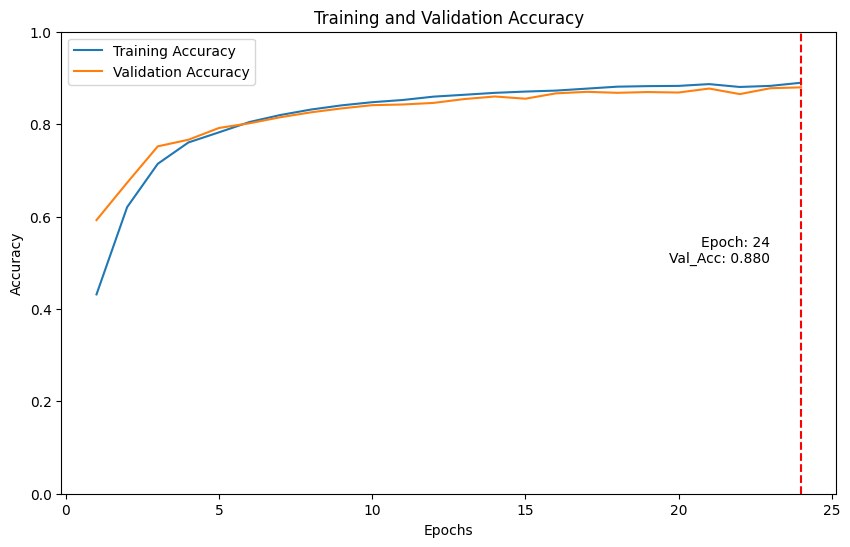

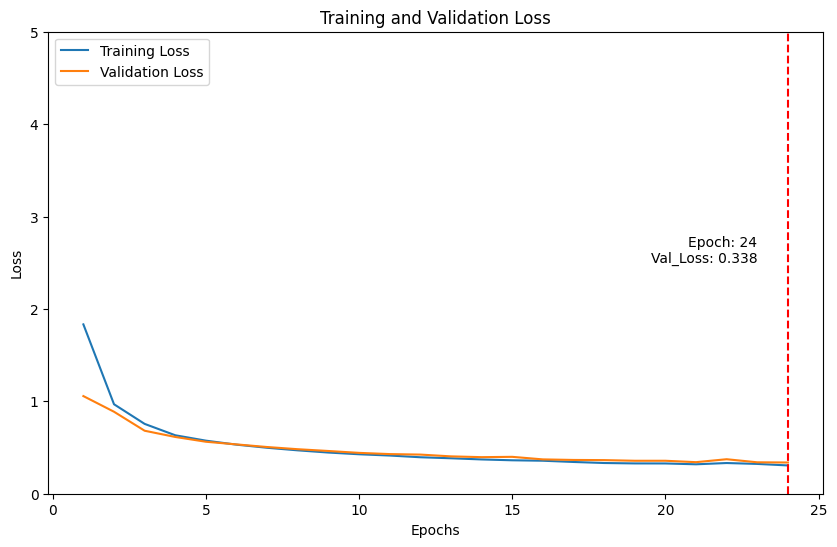

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 12
conv_kernel_size = (3, 3)
conv_strides = (1, 1)
conv_padding = 'valid'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 192
dense_units_2 = 384
dense_units_3 = 768
dense_units_4 = 768
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura grande
model = keras.Sequential([
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    keras.layers.Flatten(name='flatten'),
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model')

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### El modelo grande generaliza mejor que el mediano y el pequeño, no presenta overfitting ni underfitting. Además, tiene un Validation Loss más bajo que los modelos anteriores. Sin embargo, aún podría ser mejorado.

#### validation loss: 0.338 validation accuracy: 0.88

# 3. ▦ Mejore los 3 modelos (20 puntos)

**De las tres arquitecturas anteriores, pruebe mejorando los modelos cambiandohiperparametros como: tamaño del kernel, número de filtros, stride, padding, etc.Intente mejorar cada uno de los tres modelos creados en el punto anterior. Entrenelos modelos. (20 puntos)**

## Modelo Pequeño Mejorado

Epoch 1/24


2023-06-08 18:59:22.329032: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 0: 18368 vs 4140
2023-06-08 18:59:22.329100: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 1: 19056 vs 5680
2023-06-08 18:59:22.329110: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 2: 19056 vs 5636
2023-06-08 18:59:22.329115: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 3: 18368 vs 4148
2023-06-08 18:59:22.329119: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 4: 19040 vs 5580
2023-06-08 18:59:22.329122: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 5: 19760 vs 8192
2023-06-08 18:59:22.329126: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 6: 19760 vs 8192
2023-06-08 18:59:22.329129: E tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:731] Difference at 7: 19056 vs 5456
2023-06-08 18:59

6/6 [==============================] - 9s 179ms/step - loss: 2.2337 - accuracy: 0.1648 - val_loss: 2.0645 - val_accuracy: 0.2244
Epoch 2/24
6/6 [==============================] - 0s 32ms/step - loss: 1.8441 - accuracy: 0.2830 - val_loss: 1.5400 - val_accuracy: 0.3743
Epoch 3/24
6/6 [==============================] - 0s 33ms/step - loss: 1.3250 - accuracy: 0.5082 - val_loss: 1.0967 - val_accuracy: 0.5938
Epoch 4/24
6/6 [==============================] - 0s 33ms/step - loss: 0.9846 - accuracy: 0.6124 - val_loss: 0.8979 - val_accuracy: 0.6606
Epoch 5/24
6/6 [==============================] - 0s 33ms/step - loss: 0.8260 - accuracy: 0.6885 - val_loss: 0.7803 - val_accuracy: 0.7166
Epoch 6/24
6/6 [==============================] - 0s 31ms/step - loss: 0.7222 - accuracy: 0.7354 - val_loss: 0.6938 - val_accuracy: 0.7485
Epoch 7/24
6/6 [==============================] - 0s 33ms/step - loss: 0.6536 - accuracy: 0.7584 - val_loss: 0.6372 - val_accuracy: 0.7637
Epoch 8/24
6/6 [=====================

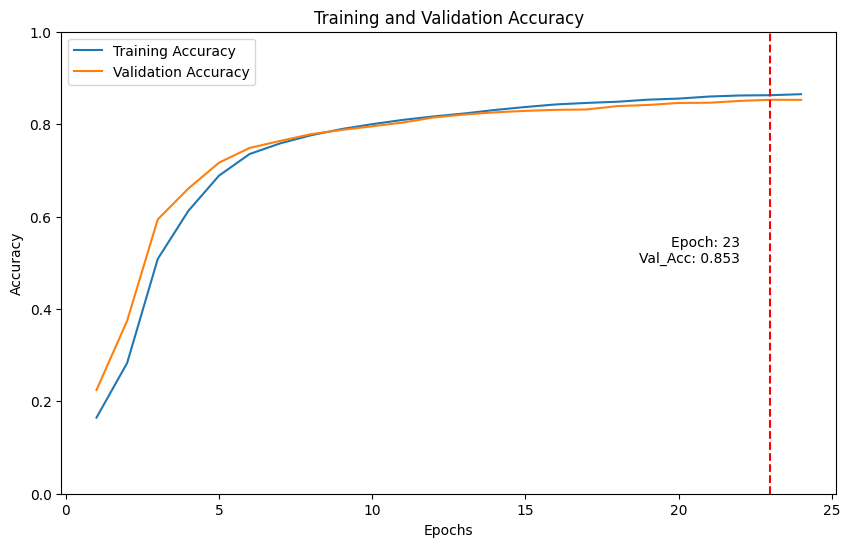

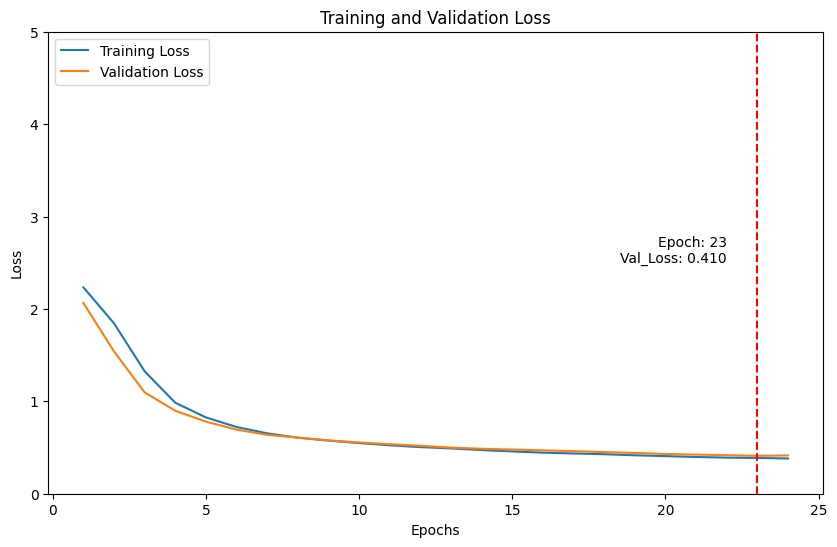

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se incrementa filter size
conv_kernel_size = (4, 4) # se incrementa kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 24
dense_units_2 = 48
dense_units_3 = 96
dense_units_4 = 192 # se incrementa
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura pequeña mejorada
model_small_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_small_improved')

model_small_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_small_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_small_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### La diferencia entre el modelo pequeño mejorado y su versión sin mejoras es casi nula. Por lo tanto, en este modelo pequeño, los cambios no son relevantes. No se observa ni underfitting ni overfitting en este caso.

#### validation loss: 0.414 validation accuracy: 0.853

##  Modelo Mediano Mejorado

Epoch 1/24
6/6 [==============================] - 5s 219ms/step - loss: 2.0881 - accuracy: 0.3936 - val_loss: 1.5049 - val_accuracy: 0.6003
Epoch 2/24
6/6 [==============================] - 0s 34ms/step - loss: 1.1361 - accuracy: 0.6180 - val_loss: 0.8911 - val_accuracy: 0.6621
Epoch 3/24
6/6 [==============================] - 0s 32ms/step - loss: 0.8071 - accuracy: 0.6950 - val_loss: 0.7305 - val_accuracy: 0.7332
Epoch 4/24
6/6 [==============================] - 0s 30ms/step - loss: 0.6778 - accuracy: 0.7472 - val_loss: 0.6387 - val_accuracy: 0.7626
Epoch 5/24
6/6 [==============================] - 0s 30ms/step - loss: 0.6030 - accuracy: 0.7723 - val_loss: 0.5933 - val_accuracy: 0.7687
Epoch 6/24
6/6 [==============================] - 0s 30ms/step - loss: 0.5577 - accuracy: 0.7902 - val_loss: 0.5483 - val_accuracy: 0.7943
Epoch 7/24
6/6 [==============================] - 0s 29ms/step - loss: 0.5157 - accuracy: 0.8093 - val_loss: 0.5146 - val_accuracy: 0.8081
Epoch 8/24
6/6 [==========

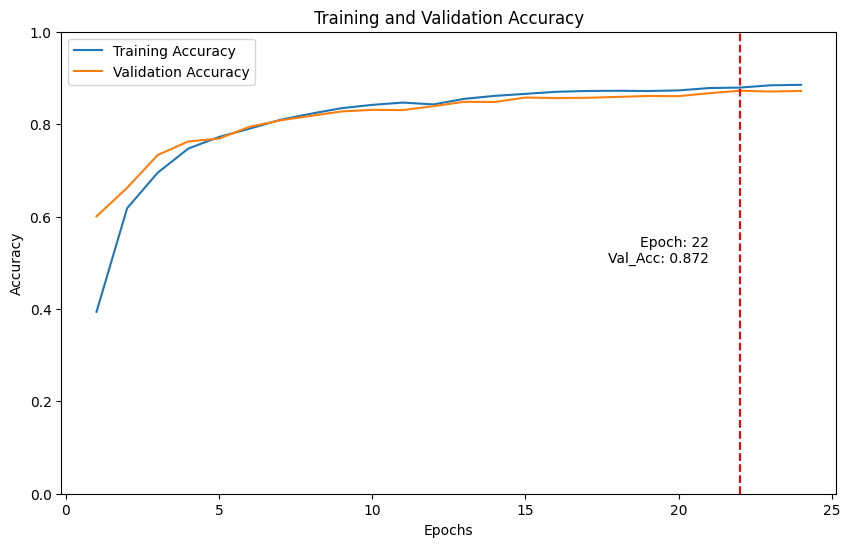

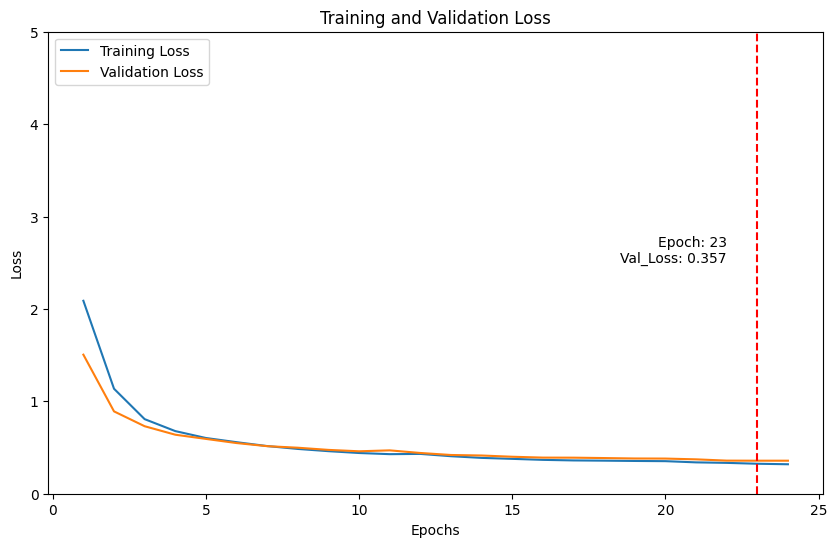

In [ ]:
## Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se incrementa filter size
conv_kernel_size = (4, 4) # se incrementa kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 96
dense_units_2 = 192
dense_units_3 = 384
dense_units_4 = 768 # se aumenta
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura mediana mejorada
model_medium_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_medium_improved')

model_medium_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_medium_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_medium_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### La diferencia aquí también es casi nula. El modelo mediano mejorado no presenta mejoras notables en comparación con su versión anterior, pero sigue siendo mejor que el modelo pequeño. No se observa ni underfitting ni overfitting en este caso.

#### validation loss: 0.357 validation accuracy: 0.872

## ⯐ Modelo Grande Mejorado (ganador)

Epoch 1/24
6/6 [==============================] - 6s 191ms/step - loss: 1.7928 - accuracy: 0.4470 - val_loss: 1.0391 - val_accuracy: 0.5992
Epoch 2/24
6/6 [==============================] - 0s 35ms/step - loss: 0.9971 - accuracy: 0.6264 - val_loss: 0.8584 - val_accuracy: 0.6930
Epoch 3/24
6/6 [==============================] - 0s 32ms/step - loss: 0.7493 - accuracy: 0.7219 - val_loss: 0.6987 - val_accuracy: 0.7527
Epoch 4/24
6/6 [==============================] - 0s 32ms/step - loss: 0.6379 - accuracy: 0.7609 - val_loss: 0.6211 - val_accuracy: 0.7686
Epoch 5/24
6/6 [==============================] - 0s 34ms/step - loss: 0.5783 - accuracy: 0.7821 - val_loss: 0.5674 - val_accuracy: 0.7891
Epoch 6/24
6/6 [==============================] - 0s 31ms/step - loss: 0.5280 - accuracy: 0.8054 - val_loss: 0.5322 - val_accuracy: 0.8040
Epoch 7/24
6/6 [==============================] - 0s 34ms/step - loss: 0.4968 - accuracy: 0.8209 - val_loss: 0.5015 - val_accuracy: 0.8147
Epoch 8/24
6/6 [==========

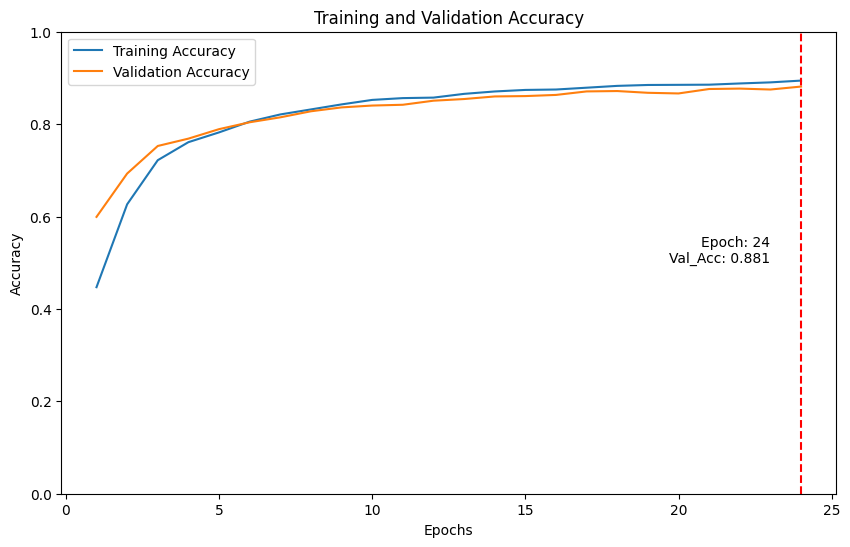

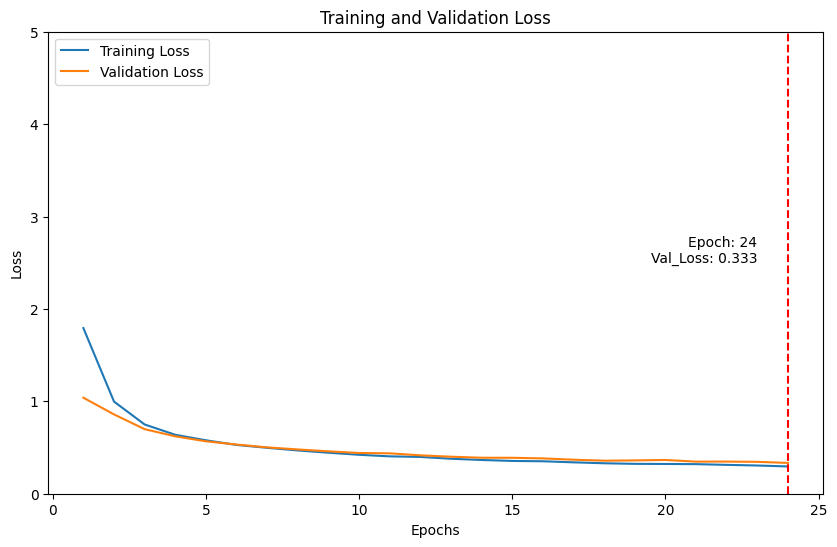

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se aumenta filter size
conv_kernel_size = (4, 4) # se aumenta kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 192
dense_units_2 = 384
dense_units_3 = 768
dense_units_4 = 1024 # se aumenta
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura grande mejorada
model_large_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1'
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2'
    ),
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_large_improved')

model_large_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_large_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_large_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### Al igual que en los casos anteriores, tampoco se observa una mejora significativa en este modelo. Sin embargo, en este caso se empieza a notar un poco más la diferencia de los cambios, posiblemente debido a que el modelo es más grande y tiene más parámetros, lo que lo hace más susceptible a cambios. No se detecta ni overfitting ni underfitting, y este modelo es ligeramente mejor que su versión sin mejoras.

#### validation loss: 0.333 validation accuracy: 0.881


# 4. ▦ Mejore los 3 modelos con regularización (20 puntos)

**De los tres modelos con arquitecturas distintas pruebe mejorandolos utilizandométodos de regularización. Pruebe al menos un método de regularización. Entrenelos modelos. (20 puntos)**

In [ ]:
from tensorflow.keras import regularizers

## ⯐ Modelo Pequeño Regularizado (ganador)

Epoch 1/24
6/6 [==============================] - 4s 190ms/step - loss: 2.4245 - accuracy: 0.2155 - val_loss: 2.2999 - val_accuracy: 0.3404
Epoch 2/24
6/6 [==============================] - 0s 32ms/step - loss: 2.1326 - accuracy: 0.3631 - val_loss: 1.7867 - val_accuracy: 0.5186
Epoch 3/24
6/6 [==============================] - 0s 35ms/step - loss: 1.6316 - accuracy: 0.4626 - val_loss: 1.2856 - val_accuracy: 0.5842
Epoch 4/24
6/6 [==============================] - 0s 29ms/step - loss: 1.2896 - accuracy: 0.5525 - val_loss: 1.0646 - val_accuracy: 0.6306
Epoch 5/24
6/6 [==============================] - 0s 30ms/step - loss: 1.1031 - accuracy: 0.6195 - val_loss: 0.9543 - val_accuracy: 0.6785
Epoch 6/24
6/6 [==============================] - 0s 33ms/step - loss: 0.9885 - accuracy: 0.6654 - val_loss: 0.8776 - val_accuracy: 0.7152
Epoch 7/24
6/6 [==============================] - 0s 35ms/step - loss: 0.9117 - accuracy: 0.7043 - val_loss: 0.8218 - val_accuracy: 0.7300
Epoch 8/24
6/6 [==========

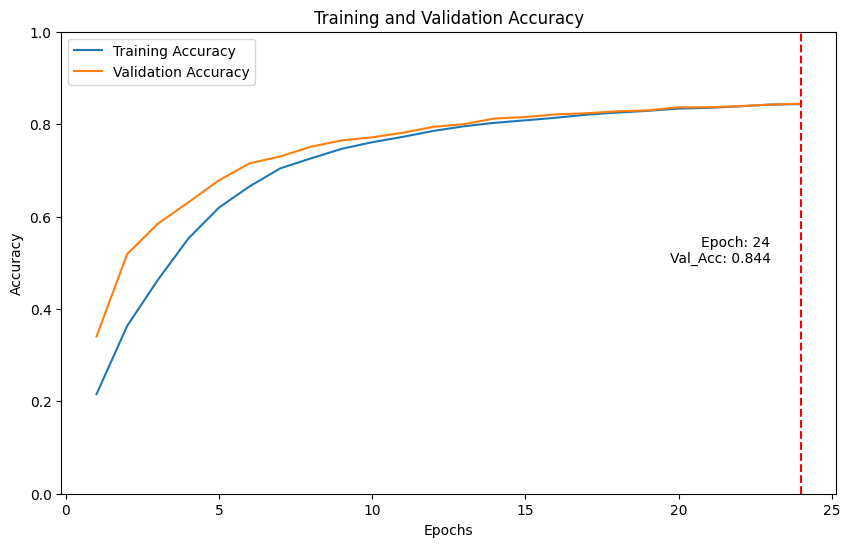

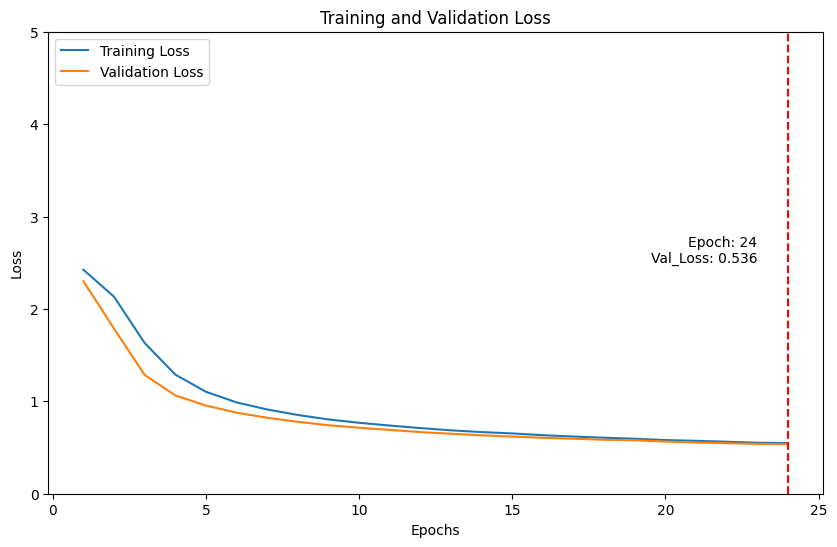

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se incrementa filter size
conv_kernel_size = (4, 4) # se incrementa kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 24
dense_units_2 = 48
dense_units_3 = 96
dense_units_4 = 192 # se incrementa
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura pequeña mejorada con Dropout y L1 Regularization
model_small_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1',
        kernel_regularizer=regularizers.l1(0.0001)  # L1 Regularization on this layer
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2',
        kernel_regularizer=regularizers.l1(0.0001)  # L1 Regularization on this layer
    ),
    keras.layers.Dropout(0.4),  # Another Dropout layer after some Dense layer
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_small_improved')

model_small_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_small_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_small_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### Con la regularización, se observa que este modelo pequeño empeora en general. Sin embargo, se reduce significativamente la diferencia entre el Accuracy (Acc) y el Validation Accuracy (Val Acc), así como entre el Loss y el Validation Loss (Val Loss), eliminando así cualquier posibilidad de overfitting. Como consecuencia, el rendimiento del modelo es peor y se pierden más datos. En este caso, no es necesario aplicar regularización al modelo. Tampoco se observa overfitting ni underfitting.

#### validation loss: 0.536 validation accuracy: 0.844

## Modelo Mediano Regularizado

Epoch 1/24
6/6 [==============================] - 5s 192ms/step - loss: 9.2920 - accuracy: 0.2542 - val_loss: 8.1138 - val_accuracy: 0.2869
Epoch 2/24
6/6 [==============================] - 0s 29ms/step - loss: 7.2053 - accuracy: 0.4202 - val_loss: 6.0646 - val_accuracy: 0.5366
Epoch 3/24
6/6 [==============================] - 0s 29ms/step - loss: 5.5368 - accuracy: 0.5596 - val_loss: 4.8504 - val_accuracy: 0.5985
Epoch 4/24
6/6 [==============================] - 0s 31ms/step - loss: 4.4187 - accuracy: 0.6277 - val_loss: 3.8338 - val_accuracy: 0.6678
Epoch 5/24
6/6 [==============================] - 0s 37ms/step - loss: 3.5126 - accuracy: 0.6833 - val_loss: 3.0773 - val_accuracy: 0.6879
Epoch 6/24
6/6 [==============================] - 0s 33ms/step - loss: 2.8334 - accuracy: 0.7132 - val_loss: 2.5209 - val_accuracy: 0.7178
Epoch 7/24
6/6 [==============================] - 0s 32ms/step - loss: 2.3715 - accuracy: 0.7286 - val_loss: 2.1936 - val_accuracy: 0.7192
Epoch 8/24
6/6 [==========

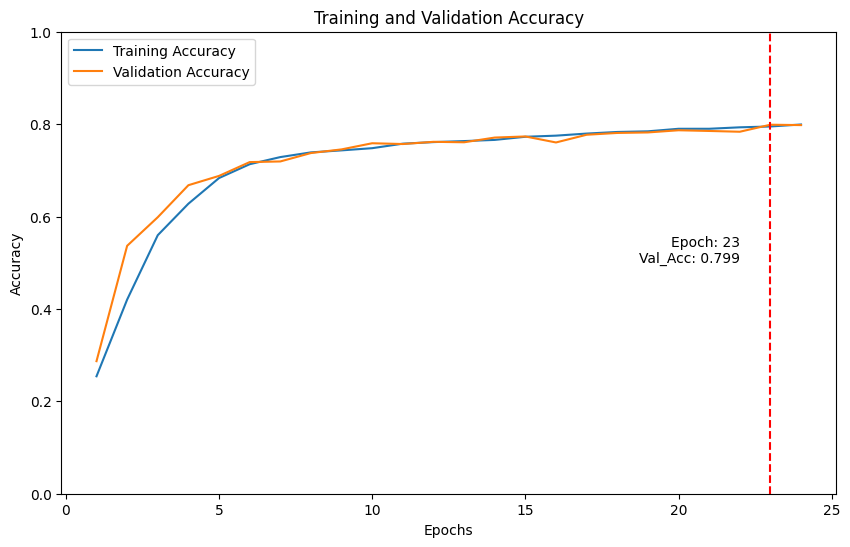

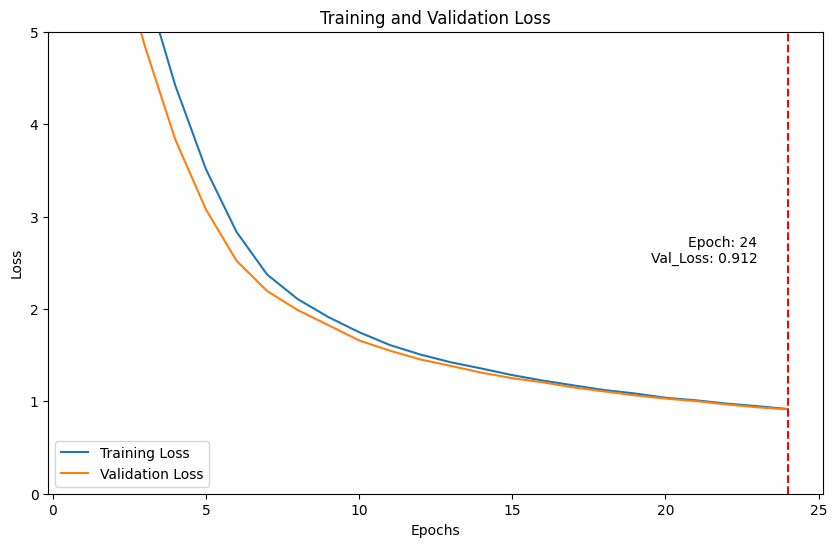

In [ ]:
## Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se incrementa filter size
conv_kernel_size = (4, 4) # se incrementa kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 96
dense_units_2 = 192
dense_units_3 = 384
dense_units_4 = 768 # se aumenta
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura mediana mejorada con Dropout y L1 Regularization
model_medium_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1',
        kernel_regularizer=regularizers.l1(0.001)  # L1 Regularization on this layer
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2',
        kernel_regularizer=regularizers.l1(0.001)  # L1 Regularization on this layer
    ),
    keras.layers.Dropout(0.4),  # Another Dropout layer after some Dense layer
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_medium_improved')

model_medium_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_medium_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_medium_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### En el caso de este modelo, el modelo mediano, ocurre algo similar: el rendimiento empeora y se pierden muchos más datos en comparación con el modelo pequeño. La diferencia es considerablemente mayor. Aunque no se observa ni underfitting ni overfitting, este modelo se acerca al underfitting. No es necesario aplicar regularización en este caso tampoco.

#### validation loss: 0.912 validation accuracy: 0.798

## Modelo Grande Regularizado

Epoch 1/24
6/6 [==============================] - 4s 189ms/step - loss: 17.0500 - accuracy: 0.4185 - val_loss: 14.4924 - val_accuracy: 0.5705
Epoch 2/24
6/6 [==============================] - 0s 34ms/step - loss: 12.9567 - accuracy: 0.5751 - val_loss: 11.1401 - val_accuracy: 0.6017
Epoch 3/24
6/6 [==============================] - 0s 29ms/step - loss: 10.0586 - accuracy: 0.6462 - val_loss: 8.6343 - val_accuracy: 0.7040
Epoch 4/24
6/6 [==============================] - 0s 30ms/step - loss: 7.7613 - accuracy: 0.7179 - val_loss: 6.6436 - val_accuracy: 0.7371
Epoch 5/24
6/6 [==============================] - 0s 30ms/step - loss: 5.9751 - accuracy: 0.7388 - val_loss: 5.1214 - val_accuracy: 0.7457
Epoch 6/24
6/6 [==============================] - 0s 29ms/step - loss: 4.6254 - accuracy: 0.7528 - val_loss: 4.0293 - val_accuracy: 0.7561
Epoch 7/24
6/6 [==============================] - 0s 30ms/step - loss: 3.8176 - accuracy: 0.7248 - val_loss: 3.4430 - val_accuracy: 0.7498
Epoch 8/24
6/6 [=====

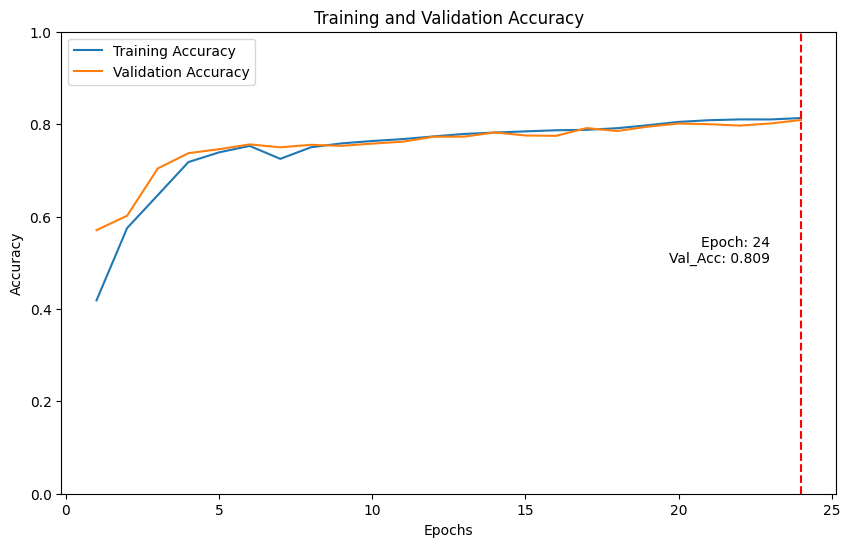

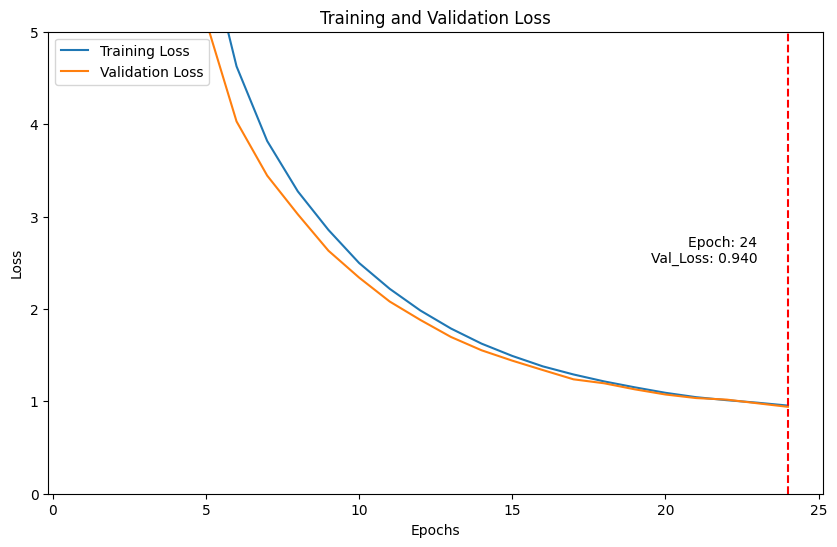

In [ ]:
# Definir los hiperparámetros
input_shape = (28, 28, 1)
conv_filters = 16 # se aumenta filter size
conv_kernel_size = (4, 4) # se aumenta kernel size
conv_strides = (1, 1)
conv_padding = 'same' # se cambia padding a 'same'
conv_activation = mish
max_pool_size = (2, 2)
dense_units_1 = 192
dense_units_2 = 384
dense_units_3 = 768
dense_units_4 = 1024 # se aumenta
dense_activation = mish
output_units = 10
output_activation = 'softmax'

# Arquitectura grande mejorada con Dropout y L1 Regularization
model_large_improved = keras.Sequential([
    # Convolutional Layer
    keras.layers.Conv2D(
        filters=conv_filters,
        kernel_size=conv_kernel_size,
        strides=conv_strides,
        padding=conv_padding,
        activation=conv_activation,
        input_shape=input_shape,
        name='conv2d_1'
    ),
    # Pooling Layer
    keras.layers.MaxPooling2D(
        pool_size=max_pool_size,
        name='maxpool2d_1'
    ),
    # Flatten Layer
    keras.layers.Flatten(name='flatten'),
    # Dense Layers
    keras.layers.Dense(
        units=dense_units_1,
        activation=dense_activation,
        name='dense_1',
        kernel_regularizer=regularizers.l1(0.001)  # L1 Regularization on this layer
    ),
    keras.layers.Dense(
        units=dense_units_2,
        activation=dense_activation,
        name='dense_2',
        kernel_regularizer=regularizers.l1(0.001)  # L1 Regularization on this layer
    ),
    keras.layers.Dropout(0.4),  # Another Dropout layer after some Dense layer
    keras.layers.Dense(
        units=dense_units_3,
        activation=dense_activation,
        name='dense_3'
    ),
    keras.layers.Dense(
        units=dense_units_4,
        activation=dense_activation,
        name='dense_4'
    ),
    # Output Layer
    keras.layers.Dense(
        units=output_units,
        activation=output_activation,
        name='dense_output'
    )
], name='model_large_improved')

model_large_improved.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

with tf.device('GPU:0'):
    history = model_large_improved.fit(X_train, Y_train, batch_size=10000, epochs=24, validation_data=(X_test, Y_test))
    model_large_improved.summary()

history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### Curiosamente, este modelo no es mucho peor que el modelo mediano, a pesar de tener más parámetros. Sin embargo, está severamente limitado por la regularización. No presenta ni underfitting ni overfitting, por lo que no necesita regularización adicional.

#### validation loss: 0.94 validation accuracy: 0.809

# 5. ▦ Resnet (10 puntos)

**Utilice una Resnet para resolver el problema. Entrene el modelo. (10 puntos)**

## Modelo Resnet

In [ ]:
# Se cambian las dimensiones de entrada para calzar con el resnet
X_train2 = X_train.reshape(-1, 28, 28, 1)
X_test2 = X_test.reshape(-1, 28, 28, 1)


In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, ReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform


def res_block(X, filters):
    X_shortcut = X

    # Primer componente de la ruta principal
    X = Conv2D(filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = ReLU()(X)

    # Segundo componente de la ruta principal
    X = Conv2D(filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)

    # Se modifica la ruta del acceso directo para que coincida con la ruta principal
    X_shortcut = Conv2D(filters, kernel_size = (1,1), strides = (1,1), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Se agrega la ruta de acceso directo a la ruta principal y se pasa a través de un ReLU
    X = Add()([X, X_shortcut])
    X = ReLU()(X)

    return X

def create_resnet_model(input_shape):
    # Definir la entrada
    X_input = Input(input_shape)

    # Primer bloque convolucional
    X = Conv2D(16, kernel_size = (5,5), strides = (1,1))(X_input)
    X = BatchNormalization(axis = 3)(X)
    X = ReLU()(X)
    X = MaxPooling2D((2, 2))(X)

    # Bloques de ResNet
    X = res_block(X, 32)
    X = res_block(X, 64)
    X = res_block(X, 128)

    # Capa final de clasificación
    X = Flatten()(X)
    X = Dense(10, activation = 'softmax')(X)

    # Crear el modelo
    model = Model(inputs = X_input, outputs = X, name = 'ResNetModel')

    return model


Epoch 1/24
118/118 [==============================] - 25s 69ms/step - loss: 0.6335 - accuracy: 0.8245 - val_loss: 2.9358 - val_accuracy: 0.1689
Epoch 2/24
118/118 [==============================] - 13s 112ms/step - loss: 0.2595 - accuracy: 0.9061 - val_loss: 2.5469 - val_accuracy: 0.3828
Epoch 3/24
118/118 [==============================] - 5s 38ms/step - loss: 0.2102 - accuracy: 0.9232 - val_loss: 1.1578 - val_accuracy: 0.6503
Epoch 4/24
118/118 [==============================] - 5s 39ms/step - loss: 0.1613 - accuracy: 0.9410 - val_loss: 0.4002 - val_accuracy: 0.8543
Epoch 5/24
118/118 [==============================] - 5s 40ms/step - loss: 0.1242 - accuracy: 0.9546 - val_loss: 0.4109 - val_accuracy: 0.8638
Epoch 6/24
118/118 [==============================] - 5s 39ms/step - loss: 0.0930 - accuracy: 0.9671 - val_loss: 0.3256 - val_accuracy: 0.8966
Epoch 7/24
118/118 [==============================] - 4s 38ms/step - loss: 0.0772 - accuracy: 0.9724 - val_loss: 0.3925 - val_accuracy: 0.8

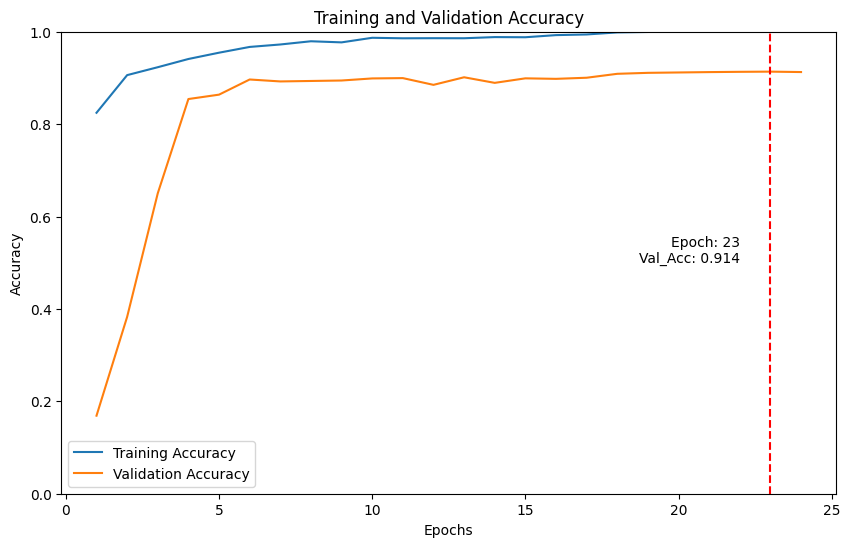

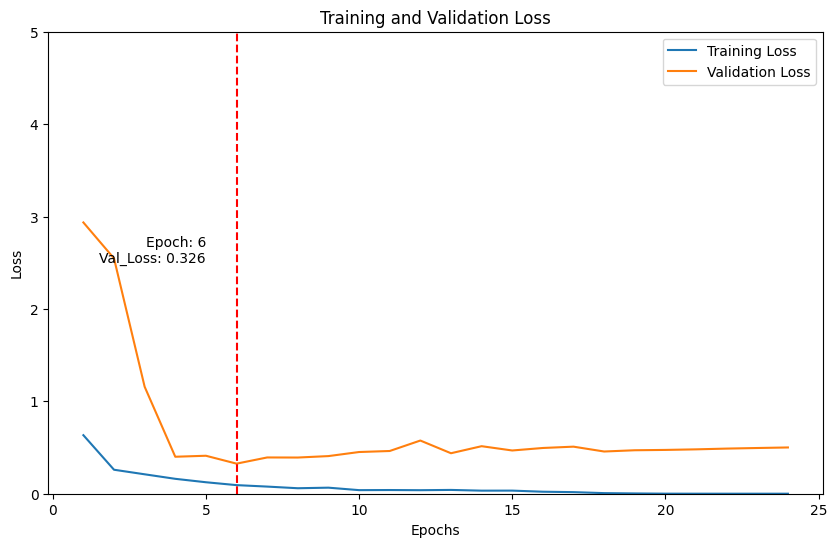

In [ ]:

# Crear el modelo y compilarlo
model_resnet = create_resnet_model((28, 28, 1))
model_resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Ajustar el modelo

with tf.device('GPU:0'):
  history = model_resnet.fit(X_train2, Y_train, batch_size = 512, epochs = 24, validation_data = (X_test2, Y_test))

# Resumir el modelo
model_resnet.summary()

# Datos
history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### El modelo ResNet es el mejor hasta ahora, pero presenta problemas de overfitting, lo cual se puede observar en el gráfico debido a la diferencia entre el Accuracy (Acc) y el Validation Accuracy (Validation Acc), así como entre el Loss y el Validation Loss (Val Loss). Por lo tanto, se requieren mejoras en el modelo.

#### validation loss: 0.501 validation accuracy: 0.913

# 6. ▦ Mejora de Resnet (15 puntos)

**Sintonice hiperparametros de la resnet para mejorar el rendimiento del puntoanterior. Explique detalladamente cuales hiper parámetros sintoniza y que significanen la red. Entrene los modelos. (15 puntos)**

Cambios que se harán:

Tasa de aprendizaje: Este es uno de los hiperparámetros más importantes. Controla cuánto estamos ajustando los pesos de nuestra red con respecto al gradiente de pérdida. Si la tasa de aprendizaje es muy pequeña, entonces la convergencia será muy lenta, pero si es muy grande, puede hacer que la convergencia sea imposible. Vamos a utilizar un valor de 0.0001 que es bastante estándar para empezar.

Optimizador: Aquí vamos a usar el optimizador Adam, que es un método de descenso del gradiente estocástico que se basa en la estimación adaptativa de los momentos de primer y segundo orden. Según Kingma et al., 2014, el método es "computacionalmente eficiente, tiene poco requerimiento de memoria, invariante a reescalado diagonal de los gradientes, y es bien adecuado para problemas que son grandes en términos de datos y/o parámetros".

Función de activación: Las funciones de activación son fundamentales para las redes neuronales. Determinan si una neurona se activará o no en función de la suma ponderada de las entradas. En este caso, vamos a usar la función de activación ReLU (Unidad Rectificada Lineal) que es la más comúnmente utilizada en las redes neuronales convolucionales. Sin embargo, vamos a cambiar esto por una versión de ReLU denominada Mish que según Diganta Misra (2019) puede llevar a mejores rendimientos de aprendizaje.

Batch size (Tamaño de lote): Este es el número de ejemplos de entrenamiento utilizados en una iteración. En este caso, hemos reducido el tamaño del lote a 256, lo que puede llevar a un entrenamiento más lento, aunque puede estabilizarse más rapidamente.

Épocas: Es el número de veces que el algoritmo de aprendizaje recorrerá todo el conjunto de datos de entrenamiento. Aumentaremos el número de épocas a 50 para permitir un aprendizaje más prolongado de la red.

Regularización: La regularización L1 y L2 agrega una penalización al término de pérdida de la red para reducir la magnitud de los pesos en la red. La regularización L1 agrega una penalización proporcional al valor absoluto de los pesos (lo que puede resultar en la eliminación de algunas características), mientras que la regularización L2 agrega una penalización proporcional al cuadrado de los pesos (lo que reduce los pesos pero rara vez los hace exactamente cero). En este caso usaremos L2.

Dropout: Dropout es otra técnica de regularización utilizada en las redes neuronales. Durante el entrenamiento, dropout "apaga" aleatoriamente una proporción de las neuronas en la capa, lo que ayuda a prevenir el sobreajuste. Esto se hace porque al desactivar algunas neuronas, estamos obligando a la red a aprender características más robustas que no dependen de un conjunto específico de neuronas. Aqui se la aplicaremos a la capa convolucional con un valor de 0.5.

## Modelo Resnet Mejorado

Epoch 1/50
235/235 [==============================] - 20s 48ms/step - loss: 1.1866 - accuracy: 0.7663 - val_loss: 1.9671 - val_accuracy: 0.5916
Epoch 2/50
235/235 [==============================] - 15s 66ms/step - loss: 0.9263 - accuracy: 0.8487 - val_loss: 0.9434 - val_accuracy: 0.8400
Epoch 3/50
235/235 [==============================] - 10s 41ms/step - loss: 0.8582 - accuracy: 0.8701 - val_loss: 0.8404 - val_accuracy: 0.8789
Epoch 4/50
235/235 [==============================] - 10s 42ms/step - loss: 0.8129 - accuracy: 0.8809 - val_loss: 0.8028 - val_accuracy: 0.8817
Epoch 5/50
235/235 [==============================] - 10s 41ms/step - loss: 0.7718 - accuracy: 0.8906 - val_loss: 0.7608 - val_accuracy: 0.8917
Epoch 6/50
235/235 [==============================] - 10s 41ms/step - loss: 0.7366 - accuracy: 0.8989 - val_loss: 0.7432 - val_accuracy: 0.8929
Epoch 7/50
235/235 [==============================] - 10s 41ms/step - loss: 0.7102 - accuracy: 0.9011 - val_loss: 0.7236 - val_accuracy:

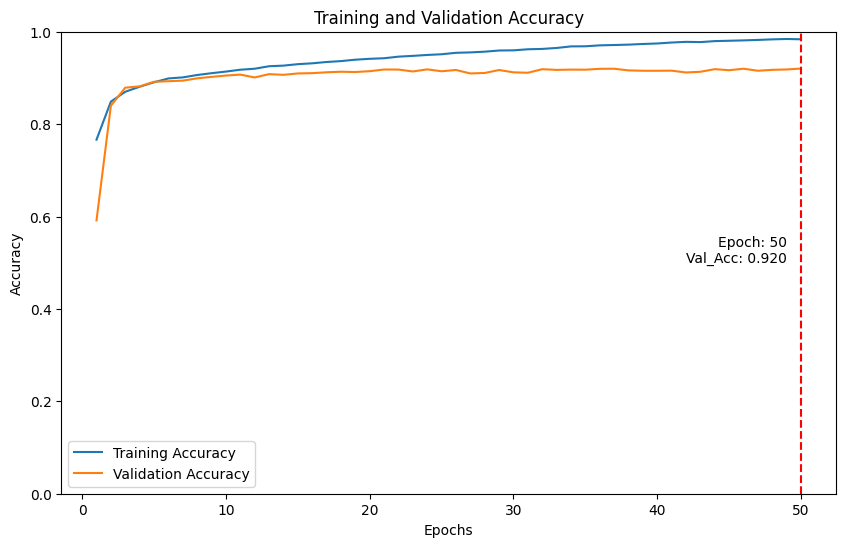

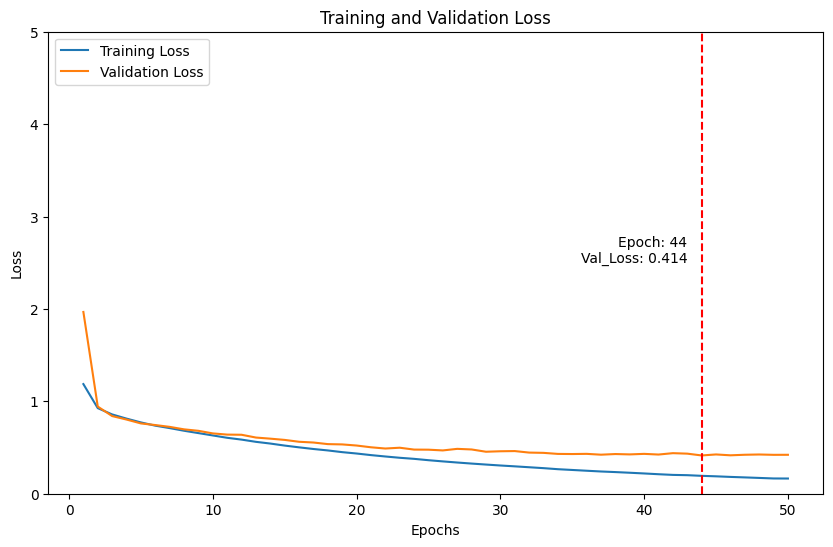

In [ ]:
# Reemplazando ReLU por Mish en los bloques de ResNet
from tensorflow.keras.layers import Dropout

def res_block(X, filters, l2_reg = 0.001, dropout_rate=0.5):
    X_shortcut = X
    reg = regularizers.l2(l2_reg)

    # Primer componente de la ruta principal
    X = Conv2D(filters, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_regularizer=reg)(X)
    X = BatchNormalization(axis = 3)(X)
    X = mish(X) # Mish activation
    X = Dropout(dropout_rate)(X)

    # Segundo componente de la ruta principal
    X = Conv2D(filters, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_regularizer=reg)(X)
    X = BatchNormalization(axis = 3)(X)

    # Se modifica la ruta del acceso directo para que coincida con la ruta principal
    X_shortcut = Conv2D(filters, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_regularizer=reg)(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Se agrega la ruta de acceso directo a la ruta principal y se pasa a través de un ReLU
    X = Add()([X, X_shortcut])
    X = mish(X) # Mish activation

    return X


# Crear el modelo y compilarlo
model_resnet = create_resnet_model((28, 28, 1))

# Ajustando la tasa de aprendizaje y el optimizador
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_resnet.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Ajustar el modelo
with tf.device('GPU:0'):
  history = model_resnet.fit(X_train2, Y_train, batch_size = 256, epochs = 50, validation_data = (X_test2, Y_test))
  model_resnet.summary()



# Datos
history_dict = history.history
last_epoch_loss = round(history_dict['loss'][-1],3)
last_epoch_accuracy = round(history_dict['accuracy'][-1],3)
last_epoch_val_loss = round(history_dict['val_loss'][-1],3)
last_epoch_val_accuracy = round(history_dict['val_accuracy'][-1],3)

print(f"Last epoch - loss: {last_epoch_loss}, accuracy: {last_epoch_accuracy}, validation loss: {last_epoch_val_loss}, validation accuracy: {last_epoch_val_accuracy}")

epochs = range(1, len(history_dict['accuracy']) + 1)

# Grafica del Accuracy
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
max_val_acc_epoch = np.argmax(history_dict['val_accuracy']) + 1
max_val_acc = history_dict['val_accuracy'][max_val_acc_epoch - 1]
plt.axvline(x=max_val_acc_epoch, color='r', linestyle='--')
plt.text(max_val_acc_epoch-1, 0.5, f'Epoch: {max_val_acc_epoch}\nVal_Acc: {max_val_acc:.3f}', horizontalalignment='right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0, 1])
plt.show()

# Grafica del Loss
plt.figure(figsize=(10,6))
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
min_val_loss_epoch = np.argmin(history_dict['val_loss']) + 1
min_val_loss = history_dict['val_loss'][min_val_loss_epoch - 1]
plt.axvline(x=min_val_loss_epoch, color='r', linestyle='--')
plt.text(min_val_loss_epoch-1, 2.5, f'Epoch: {min_val_loss_epoch}\nVal_Loss: {min_val_loss:.3f}', horizontalalignment='right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 5])
plt.show()


### El modelo ResNet Mejorado logró reducir el Validation Loss e incrementar el Validation Accuracy, convirtiéndose así en el mejor modelo hasta ahora. Aunque se observa un ligero overfitting a medida que aumentan las épocas según el gráfico, se puede concluir que la regularización beneficia a este modelo y aún tiene margen de mejora.

#### validation loss: 0.421 validation accuracy: 0.92

# 7. ▦ Conclusión (10 puntos)

**De los modelos probados en su trabajo, diga cuál es más confiable. Agregue conclusiones finales del trabajo completo. (10 puntos)**

## Modelo ganador: Modelo Resnet Mejorado

El mejor modelo fue el ResNet mejorado. Fuera de los ResNet, el modelo grande inicial también obtuvo un Validation Accuracy bastante alto, pero un Validation Accuracy bastante bajo. Sin embargo, la diferencia entre el ResNet mejorado y el modelo grande inicial radica en que el ResNet muestra más indicios de overfitting, mientras que el modelo grande inicial tenía una mejor capacidad de generalización a pesar de tener métricas como un peor Validation Accuracy, pero con un mejor Validation Loss.

En conclusión, es difícil decidir cuál es mejor entre estos dos, ya que ambos tienen ventajas y desventajas. No obstante, el modelo ResNet mejorado todavía tiene margen de mejora, mientras que el modelo grande inicial está limitado. Por esta razón, decido que el modelo ganador es el ResNet mejorado.

## Conclusión final del trabajo completo

A lo largo de este proyecto, se ha realizado una serie de experimentos con diferentes arquitecturas de modelos de Deep Learning para clasificar el conjunto de datos Fashion-MNIST. Se comenzó con modelos relativamente pequeños y sencillos, y luego se experimentó con modelos más grandes y complejos, así como con técnicas de regularización y optimización.

El modelo más pequeño proporcionó una precisión razonablemente alta (85.3%), pero había margen de mejora. Los modelos medianos y grandes mostraron mejoras incrementales en la precisión y la pérdida, y después de las mejoras y la regularización, obtuvimos resultados similares o ligeramente mejores. Sin embargo, la regularización a menudo resultó en un rendimiento más pobre, probablemente debido a la reducción de la capacidad del modelo y al aumento del sesgo.

La implementación de una arquitectura de red residual (ResNet) demostró ser una mejora significativa, alcanzando una precisión de validación del 91.3%. No obstante, el modelo mostró signos de sobreajuste, ya que el rendimiento en los datos de validación no se mantuvo tan alto como en los datos de entrenamiento. Esto se mejoró aplicando técnicas de regularización, lo que llevó a una precisión de validación final del 92%.

El mejor modelo en términos de precisión y pérdida en el conjunto de validación fue el Modelo Resnet Mejorado. Sin embargo, el modelo todavía mostró signos de sobreajuste, lo que indica que hay margen para futuras mejoras, quizás mediante la exploración de otras técnicas de regularización o la experimentación con la arquitectura del modelo.